<a href="https://colab.research.google.com/github/iskra3138/ImageSr/blob/master/Feature_Map_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Feb 12 15:20:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Preliminary

In [3]:
import tensorflow as tf
from tensorflow import keras
from scipy.ndimage.interpolation import zoom
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, save_model
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import ipywidgets
from IPython.utils import io
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
import numpy as np
import pandas as pd
import cv2

import seaborn as sns
from google.colab import widgets

from time import time

In [4]:
print(f'Tf version : {tf.__version__}')
print(f'Keras version : {keras.__version__}')

Tf version : 2.4.1
Keras version : 2.4.0


In [5]:
model = tf.keras.applications.ResNet50V2(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax'
)

102875136/102869336 [==============================] - 0s 0us/step


In [53]:
!wget -O cat1.jpg https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg
Image.open('cat1.jpg').resize((224,224)).save('cat1.jpg')

--2021-02-12 15:47:21--  https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg
Resolving static.scientificamerican.com (static.scientificamerican.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to static.scientificamerican.com (static.scientificamerican.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292933 (286K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 286.07K  --.-KB/s    in 0.006s  

2021-02-12 15:47:21 (43.9 MB/s) - ‘cat1.jpg’ saved [292933/292933]



In [54]:
!wget -O cat2.jpg https://www.ctvnews.ca/polopoly_fs/1.5098407.1599687805!/httpImage/image.jpg_gen/derivatives/landscape_1020/image.jpg
Image.open('cat2.jpg').resize((224,224)).save('cat2.jpg')

--2021-02-12 15:47:22--  https://www.ctvnews.ca/polopoly_fs/1.5098407.1599687805!/httpImage/image.jpg_gen/derivatives/landscape_1020/image.jpg
Resolving www.ctvnews.ca (www.ctvnews.ca)... 104.127.185.204
Connecting to www.ctvnews.ca (www.ctvnews.ca)|104.127.185.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg                [ <=>                ] 124.23K  --.-KB/s    in 0.009s  

2021-02-12 15:47:22 (12.9 MB/s) - ‘cat2.jpg’ saved [127210]



In [55]:
!wget -O cat3.jpg https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/people_foods_cats_can_eat_slideshow/1800x1200_people_foods_cats_can_eat_slideshow.jpg
Image.open('cat3.jpg').resize((224,224)).save('cat3.jpg')

--2021-02-12 15:47:22--  https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/people_foods_cats_can_eat_slideshow/1800x1200_people_foods_cats_can_eat_slideshow.jpg
Resolving img.webmd.com (img.webmd.com)... 104.18.5.176, 104.18.4.176
Connecting to img.webmd.com (img.webmd.com)|104.18.5.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388986 (380K) [image/jpeg]
Saving to: ‘cat3.jpg’

cat3.jpg            100%[===================>] 379.87K  --.-KB/s    in 0.006s  

2021-02-12 15:47:22 (58.1 MB/s) - ‘cat3.jpg’ saved [388986/388986]



In [56]:
!wget -O cat4.jpg https://www.rd.com/wp-content/uploads/2019/05/american-curl-kitten.jpg
Image.open('cat4.jpg').resize((224,224)).save('cat4.jpg')

--2021-02-12 15:47:22--  https://www.rd.com/wp-content/uploads/2019/05/american-curl-kitten.jpg
Resolving www.rd.com (www.rd.com)... 104.18.25.214, 104.18.24.214, 2606:4700::6812:19d6, ...
Connecting to www.rd.com (www.rd.com)|104.18.25.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3143084 (3.0M) [image/jpeg]
Saving to: ‘cat4.jpg’

cat4.jpg            100%[===================>]   3.00M  --.-KB/s    in 0.01s   

2021-02-12 15:47:22 (245 MB/s) - ‘cat4.jpg’ saved [3143084/3143084]



In [57]:
!wget -O dog1.jpg https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg
Image.open('dog1.jpg').resize((224,224)).save('dog1.jpg')

--2021-02-12 15:47:23--  https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg
Resolving image.cnbcfm.com (image.cnbcfm.com)... 104.117.64.86
Connecting to image.cnbcfm.com (image.cnbcfm.com)|104.117.64.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218046 (213K) [image/jpeg]
Saving to: ‘dog1.jpg’

dog1.jpg            100%[===================>] 212.94K  --.-KB/s    in 0.007s  

2021-02-12 15:47:23 (31.1 MB/s) - ‘dog1.jpg’ saved [218046/218046]



In [9]:
!wget -O dog2.jpg https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/dogs_1280p_0.jpg
Image.open('dog2.jpg').resize((224,224)).save('dog2.jpg')

--2021-02-12 15:21:25--  https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/dogs_1280p_0.jpg
Resolving www.sciencemag.org (www.sciencemag.org)... 52.9.92.212, 52.52.207.131
Connecting to www.sciencemag.org (www.sciencemag.org)|52.9.92.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145305 (142K) [image/jpeg]
Saving to: ‘dog2.jpg’

dog2.jpg            100%[===================>] 141.90K   674KB/s    in 0.2s    

2021-02-12 15:21:26 (674 KB/s) - ‘dog2.jpg’ saved [145305/145305]



In [10]:
!wget -O car.jpg https://www.businessinsider.in/thumb/msid-74437579,width-600,resizemode-4,imgsize-161974/business/auto/news/bs6-deadline-get-discounts-of-up-to-250000-on-bs4-cars-in-india/bs4-car-discounts.jpg
Image.open('car.jpg').resize((224,224)).save('car.jpg')

--2021-02-12 15:21:26--  https://www.businessinsider.in/thumb/msid-74437579,width-600,resizemode-4,imgsize-161974/business/auto/news/bs6-deadline-get-discounts-of-up-to-250000-on-bs4-cars-in-india/bs4-car-discounts.jpg
Resolving www.businessinsider.in (www.businessinsider.in)... 104.102.205.22, 2600:1408:2000:7a2::3621, 2600:1408:2000:783::3621
Connecting to www.businessinsider.in (www.businessinsider.in)|104.102.205.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24221 (24K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]  23.65K  --.-KB/s    in 0.002s  

2021-02-12 15:21:26 (13.9 MB/s) - ‘car.jpg’ saved [24221/24221]



In [11]:
# Select layer to use
layer_widget1 = ipywidgets.Text(value="conv2_block1_preact_relu",
                                   description='layer 1 선택:',
                                   style={'description_width':'initial'})
layer_widget2 = ipywidgets.Text(value="conv3_block1_preact_relu",
                                   description='layer 2 선택:',
                                   style={'description_width':'initial'})
layer_widget3 = ipywidgets.Text(value="conv4_block1_preact_relu",
                                   description='layer 3 선택:',
                                   style={'description_width':'initial'})
layer_widget4 = ipywidgets.Text(value="conv5_block1_preact_relu",
                                   description='layer 4 선택:',
                                   style={'description_width':'initial'})
layer_widget5 = ipywidgets.Text(value="post_relu",
                                   description='layer 5 선택:',
                                   style={'description_width':'initial'})

mask_layers = [layer_widget1.value, layer_widget2.value, layer_widget3.value, layer_widget4.value, layer_widget5.value]

### Util

In [12]:
def show_scatter_plot(mask_layers, l_inputs, l_results):
  # plot scatter plots
  iname = ['outputs', 'outgrads', 'grads']
  xname = ['avg', 'max', 'min']
  n_cols = len(mask_layers)
  grid = widgets.Grid(3, n_cols)

  for l in range(len(mask_layers)):
    for i, input in enumerate(l_inputs[l]) :
      avg = np.mean(input, axis=(0,1))
      min = np.min(input, axis=(0,1))
      max = np.max(input, axis=(0,1))
      for j, x in enumerate([avg,max,min]):
        with grid.output_to(j, l):
          plt.figure(figsize = (3,2))
          sns.regplot(x=x, y=l_results[l][i], fit_reg=False) # no regression line
          plt.title('{}'.format(mask_layers[l].split('_')[0]), fontsize=14)
          plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
          plt.ylabel('preds', fontsize=14)
          plt.show()

In [13]:
def show_saliency_maps(mask_layers, l_inputs, l_results):
  iname = ['outputs', 'outgrads', 'grads']
  xname = ['avg', 'max', 'min']
  n_cols = len(mask_layers)
  grid = widgets.Grid(4, n_cols)

  for l in range(len(mask_layers)) :
    with grid.output_to(0, l):
      print (mask_layers[l])
    for i, input in enumerate(l_inputs[l]) :
      avg = np.mean(input, axis=(0,1))

      with grid.output_to(i+1, l):
        tmp = input[:,:,np.argmax(l_results[l][i])]
        tmp = tf.image.resize(tmp[:,:,np.newaxis], (224,224), method='bilinear').numpy()
        tmp = tmp[:,:,0]
        idx = np.argmax(l_results[l][i])
        print ("index: {}".format(idx))
        print ("avg:{:.2f}, pred{:.2f}".format(avg[idx], l_results[l][i][idx]))
        plt.figure(figsize = (3,3))
        plt.imshow(image[0])
        plt.imshow(tmp, cmap='jet', alpha=0.5)
        plt.axis('off')

In [14]:
import pandas as pd
def maks_result_table(mask_layers, pred, l_inputs, l_results):
  first_index = []
  for layer in mask_layers :
    layer_name = layer.split('_')[0]
    first_index.append(layer_name)
  second_index = ['conv', 'co*gr', 'grad']

  index_list = [[f for f in first_index for _ in range(3)],
                [s for _ in range(5) for s in second_index]]

  feature_list = ['#_map', "masked_pred", "org_pred", "avg", "min", "max"]
  result_df = pd.DataFrame(np.zeros((len(index_list[0]),len(feature_list))), 
                          index=index_list, 
                          columns=feature_list)
  for l in range(len(mask_layers)) :
    for i, input in enumerate(l_inputs[l]) :
      idx = np.argmax(l_results[l][i])
      result_df.loc[first_index[l] , second_index[i]]['#_map'] = idx
      result_df.loc[first_index[l] , second_index[i]]['masked_pred'] = l_results[l][i][idx]
      result_df.loc[first_index[l] , second_index[i]]['org_pred'] = pred
      result_df.loc[first_index[l] , second_index[i]]['avg'] = np.mean(input, axis=(0,1))[idx]
      result_df.loc[first_index[l] , second_index[i]]['min'] = np.min(input, axis=(0,1))[idx]
      result_df.loc[first_index[l] , second_index[i]]['max'] = np.max(input, axis=(0,1))[idx]
      
  return result_df

### Main

In [15]:
import cv2
from time import time
import numpy as np

import tensorflow as tf
#############################

def sp_xai_each_layer(images, model, layer_name, class_index, interp='bilinear', frac = 0.15):
  '''
  Derives feature maps from one, or a couple of layers, and post-processes them
  to convert them to attribution masks.

  inputs:
      images: a 4-D tensor image.
      model: the classification model
      layer_name: name of layer to investigate.
      class_index: the output class according to whom the layer(s) are visualized.
      interp: upsampling technique.
        For now, 'bilinear' and 'nearest' are supported.
      frac: The fraction of top pixels selected.
  returns:
      inputs
      results
      preds
  '''
  assert interp in ['bilinear', 'nearest'], 'Selected upsampling type undefined or unsupported.'
  # Forward pass to get attribution masks.

  ###by LGSP
  conv_outputs=[]
  for layer in model.layers:
    if layer.name == layer_name :
      conv_outputs.append(layer.output)
  conv_outputs.append(model.output)

  feedforward1=tf.keras.models.Model([model.input], [conv_outputs], trainable=False)
  with tf.GradientTape() as tape:
    ff_results=feedforward1([images])[0]
    all_fmap_masks, predictions = ff_results[:-1], ff_results[-1]
    loss = predictions[:, class_index]
  gradients = tape.gradient(loss, all_fmap_masks)
  # upsample and normalize masks.

  #start = time()
  outputs = all_fmap_masks[0][0].numpy()
  grads = gradients[0][0]
  outgrads = np.einsum('hwc,hwc->hwc', outputs, grads)

  # outputs
  pred = loss.numpy()
  results = []
  inputs = [outputs, outgrads, grads]
  for tmp_masks in inputs :							   
    if interp == 'bilinear':
      masks = tf.image.resize(tmp_masks, (224,224), method='bilinear').numpy()
    elif interp == 'nearest':
      masks = tf.image.resize(tmp_masks, (224,224), method='nearest').numpy()
    else: raise ValueError('You have selected an unsupported interpolation type.')    
    masks -= np.min(masks, axis=(0,1))
    masks /= (np.max(masks, axis=(0,1))+10e-30)
    w,h,c = masks.shape

    binary_masks = np.transpose(masks, (2, 0, 1))
    binary_masks_flat = binary_masks.reshape(c,-1)
    _, top_n_idx = tf.math.top_k(
        binary_masks_flat, k=int(w*h*frac), sorted=False, name=None
    )
    top_n_idx = top_n_idx.numpy()
    for i in range(c):
      idx = (top_n_idx[i]//w, top_n_idx[i]%w)
      binary_masks[i] = 0
      binary_masks[i][idx] = 1
    binary_masks = np.transpose(binary_masks, (1, 2, 0))
    # creates perturbed images to probe model.
    img = images[0]
    X = np.einsum('hwc,hwn->nhwc', img, binary_masks)
    # second forward pass to valuate attribution maps
    
    preds_masked = model.predict(X, verbose=0)[:,class_index]
    results.append(preds_masked)

  return inputs, results, pred

In [16]:
import cv2
from time import time
import numpy as np

import tensorflow as tf
#############################

def sp_xai_layers(images, model, layers, class_index, interp='bilinear', frac = 0.15):
  '''
  Derives feature maps from one, or a couple of layers, and post-processes them
  to convert them to attribution masks.

  inputs:
      images: a 4-D tensor image.
      model: the classification model
      layers: list of layers to investigate.
      class_index: the output class according to whom the layer(s) are visualized.
      interp: upsampling technique.
        For now, 'bilinear' and 'nearest' are supported.
      frac: The fraction of top pixels selected.
  returns:
      l_inputs
      l_results
      preds
  '''
  assert interp in ['bilinear', 'nearest'], 'Selected upsampling type undefined or unsupported.'
  # Forward pass to get attribution masks.

  ###by LGSP
  conv_outputs=[]
  for layer in model.layers:
    if np.isin(layer.name,layers):
      conv_outputs.append(layer.output)
  conv_outputs.append(model.output)

  feedforward1=tf.keras.models.Model([model.input], [conv_outputs], trainable=False)
  with tf.GradientTape() as tape:
    ff_results=feedforward1([images])[0]
    all_fmap_masks, predictions = ff_results[:-1], ff_results[-1]
    loss = predictions[:, class_index]
  gradients = tape.gradient(loss, all_fmap_masks)
  # upsample and normalize masks.

  #start = time()
  pred = loss.numpy()
  l_inputs = []
  l_results = []

  for l in range(len(layers)):
    outputs = all_fmap_masks[l][0].numpy()
    grads = gradients[l][0]
    outgrads = np.einsum('hwc,hwc->hwc', outputs, grads)
    
    inputs = [outputs, outgrads, grads]
    results = []
    for tmp_masks in inputs :							   
      if interp == 'bilinear':
        masks = tf.image.resize(tmp_masks, (224,224), method='bilinear').numpy()
      elif interp == 'nearest':
        masks = tf.image.resize(tmp_masks, (224,224), method='nearest').numpy()
      else: raise ValueError('You have selected an unsupported interpolation type.')    
      masks -= np.min(masks, axis=(0,1))
      masks /= (np.max(masks, axis=(0,1))+10e-30)
      w,h,c = masks.shape

      binary_masks = np.transpose(masks, (2, 0, 1))
      binary_masks_flat = binary_masks.reshape(c,-1)
      _, top_n_idx = tf.math.top_k(
          binary_masks_flat, k=int(w*h*frac), sorted=False, name=None
      )
      top_n_idx = top_n_idx.numpy()
      for i in range(c):
        idx = (top_n_idx[i]//w, top_n_idx[i]%w)
        binary_masks[i] = 0
        binary_masks[i][idx] = 1
      binary_masks = np.transpose(binary_masks, (1, 2, 0))
      # creates perturbed images to probe model.
      img = images[0]
      X = np.einsum('hwc,hwn->nhwc', img, binary_masks)
      # second forward pass to valuate attribution maps
      
      preds_masked = model.predict(X, verbose=0)[:,class_index]
      results.append(preds_masked)
    l_inputs.append(inputs)
    l_results.append(results)
  return l_inputs, l_results, pred

### cat1.jpg

Model prediction: class 281 , 68.37%


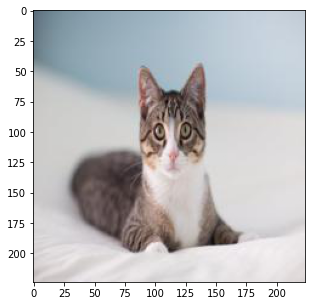

In [17]:
image = load_img('cat1.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [18]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

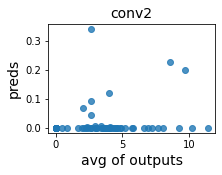

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

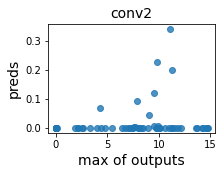

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

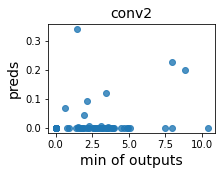

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

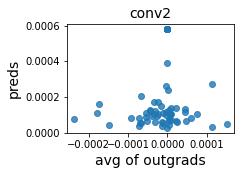

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

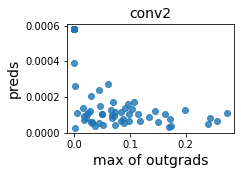

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

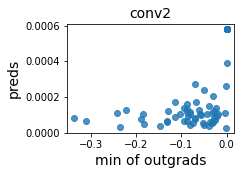

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

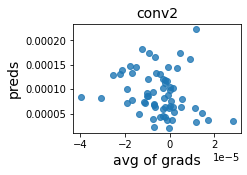

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

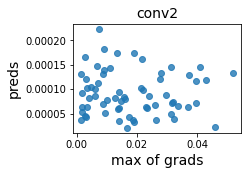

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

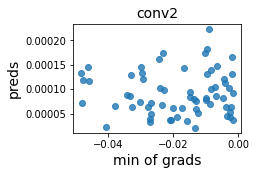

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

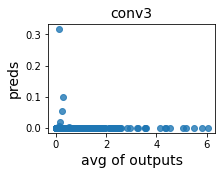

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

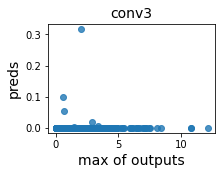

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

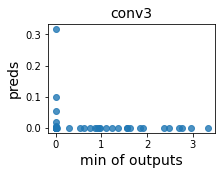

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

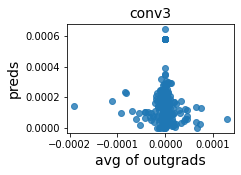

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

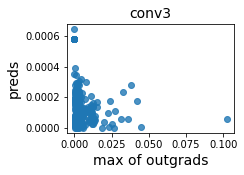

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

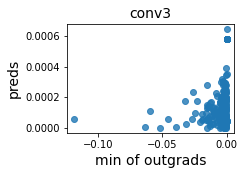

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

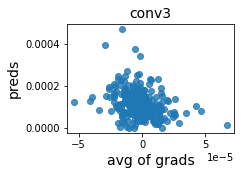

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

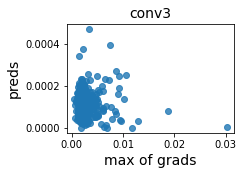

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

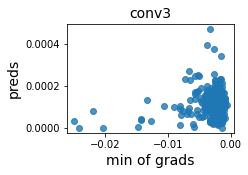

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

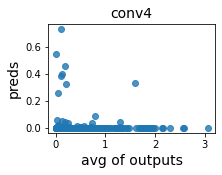

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

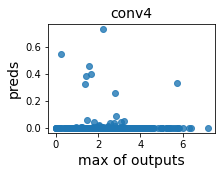

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

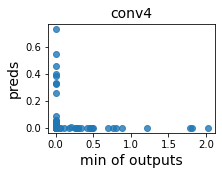

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

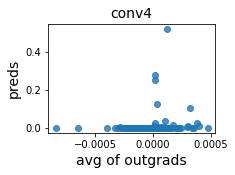

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

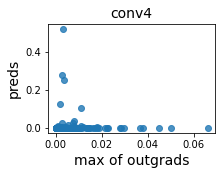

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

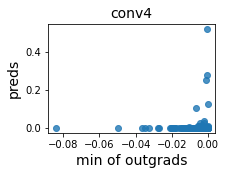

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

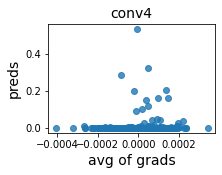

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

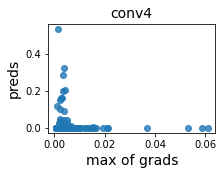

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

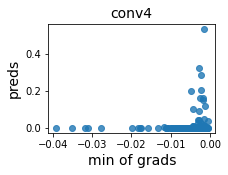

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

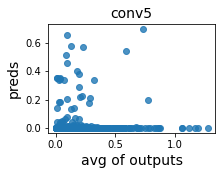

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

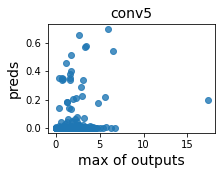

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

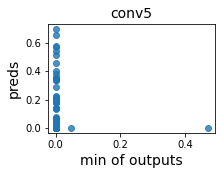

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

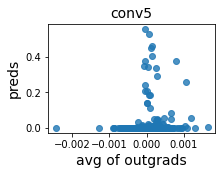

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

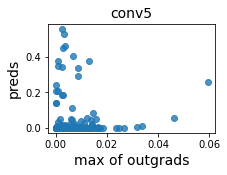

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

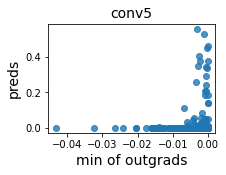

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

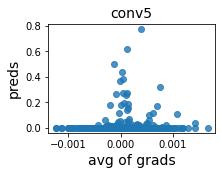

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

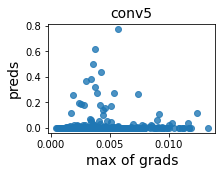

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

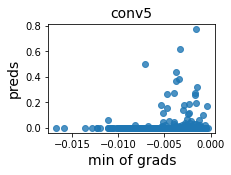

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

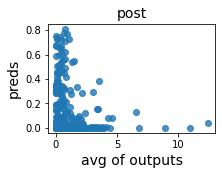

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

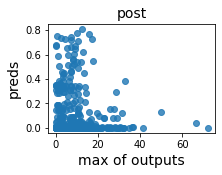

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

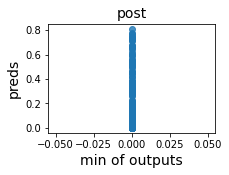

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

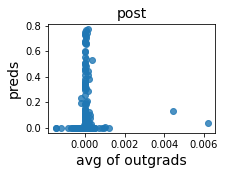

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

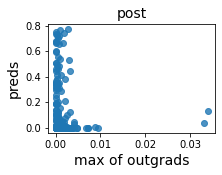

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

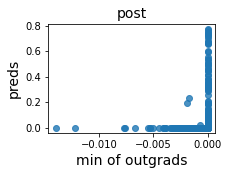

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

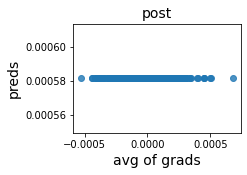

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

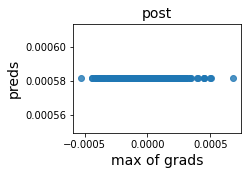

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

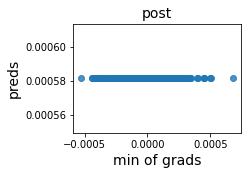

<IPython.core.display.Javascript object>

In [19]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.68


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 11
avg:2.62, pred0.34


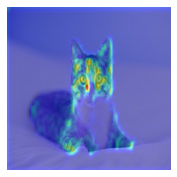

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


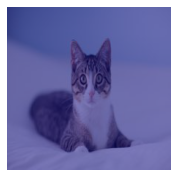

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


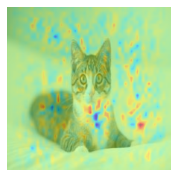

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 122
avg:0.13, pred0.32


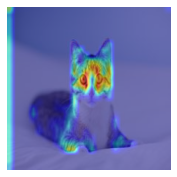

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 243
avg:-0.00, pred0.00


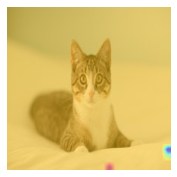

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 45
avg:-0.00, pred0.00


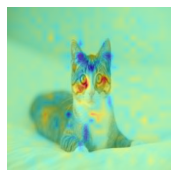

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 107
avg:0.10, pred0.73


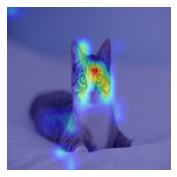

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 121
avg:0.00, pred0.52


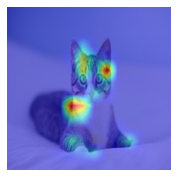

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 164
avg:-0.00, pred0.54


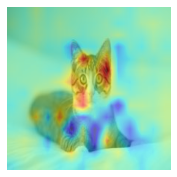

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 846
avg:0.73, pred0.70


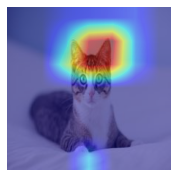

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 989
avg:-0.00, pred0.56


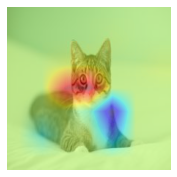

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 501
avg:0.00, pred0.78


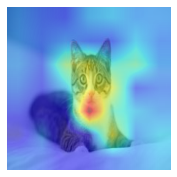

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1683
avg:0.76, pred0.81


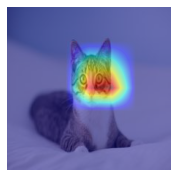

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 488
avg:0.00, pred0.78


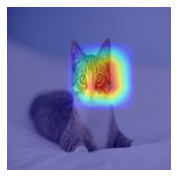

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


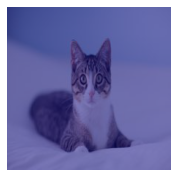

<IPython.core.display.Javascript object>

In [20]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [36]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

281


#_map  masked_pred  org_pred           avg       min        max
conv2 conv     11.0     0.340058  0.585017  2.615042e+00  1.492989  11.052000
      co*gr     6.0     0.000581  0.585017  0.000000e+00  0.000000   0.000000
      grad      0.0     0.000223  0.585017  1.154895e-05 -0.008838   0.007457
conv3 conv    122.0     0.317487  0.585017  1.283292e-01  0.000000   2.005832
      co*gr   243.0     0.000648  0.585017 -8.093583e-08 -0.000073   0.000031
      grad     45.0     0.000471  0.585017 -1.561531e-05 -0.003254   0.003444
conv4 conv    107.0     0.728995  0.585017  9.873375e-02  0.000000   2.234454
      co*gr   121.0     0.522280  0.585017  1.245219e-04 -0.000285   0.003254
      grad    164.0     0.537361  0.585017 -5.474254e-06 -0.001425   0.001654
conv5 conv    846.0     0.697370  0.585017  7.261320e-01  0.000000   5.982427
      co*gr   989.0     0.558349  0.585017 -2.852954e-05 -0.003145   0.002442
      grad    501.0     0.776175  0.585017  3.867430e-04 -0.001626   0.005669
post  conv   1683.0     0.809988  0.585017  7.577205e-01  0.000000  12.419069
      co*gr   488.0     0.775143  0.585017  1.777336e-04  0.000000   0.002719
      grad      0.0     0.000581  0.585017  4.140719e-05  0.000041   0.000041

### cat2.jpg

Model prediction: class 281 , 58.50%


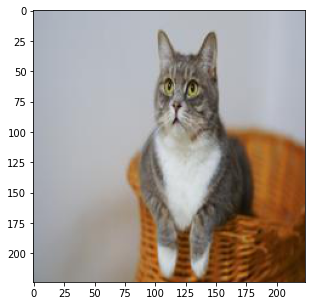

In [35]:
image = load_img('cat2.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [37]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

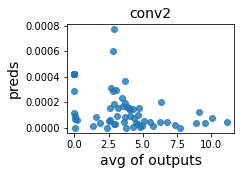

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

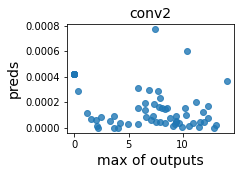

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

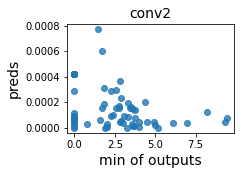

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

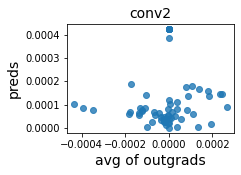

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

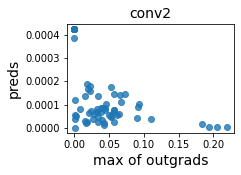

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

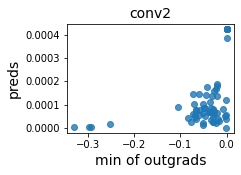

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

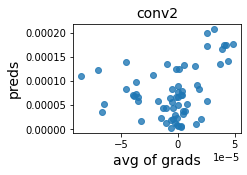

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

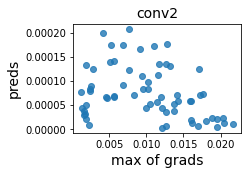

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

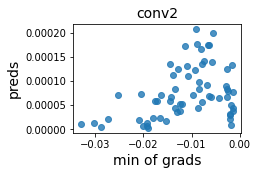

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

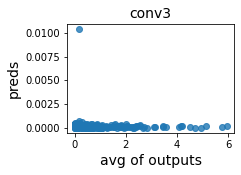

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

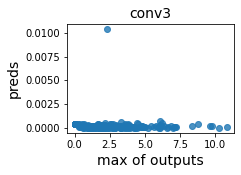

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

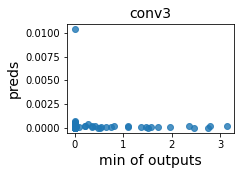

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

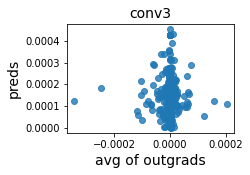

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

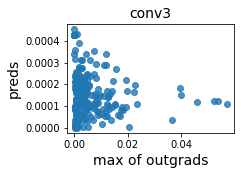

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

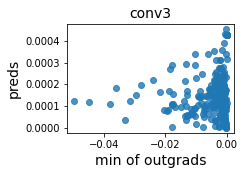

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

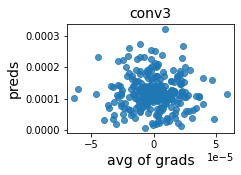

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

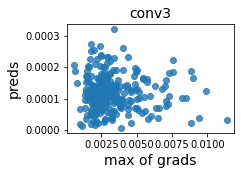

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

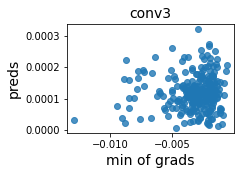

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

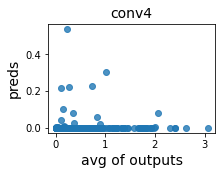

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

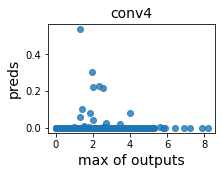

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

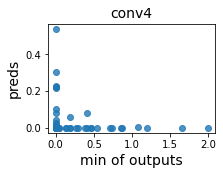

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

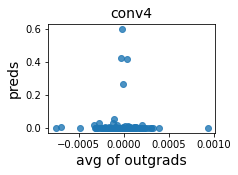

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

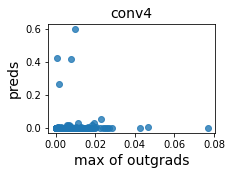

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

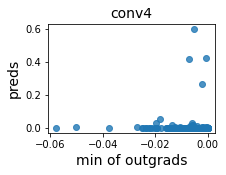

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

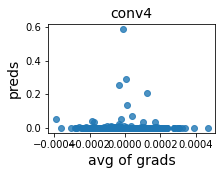

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

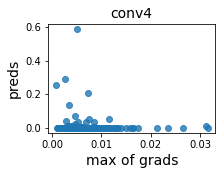

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

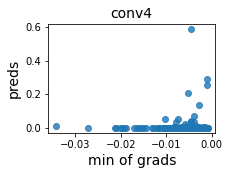

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

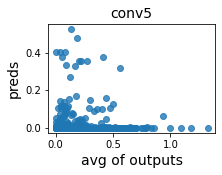

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

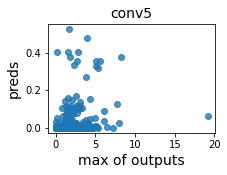

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

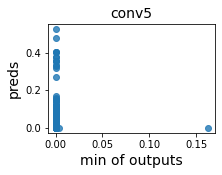

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

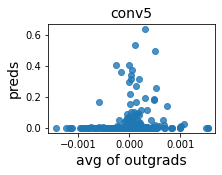

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

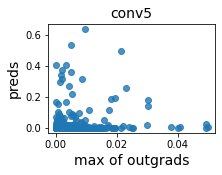

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

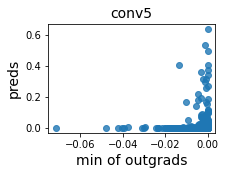

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

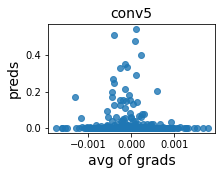

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

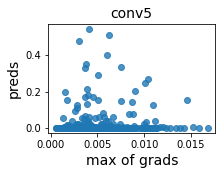

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

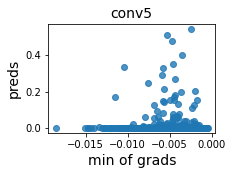

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

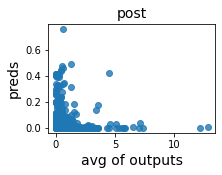

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

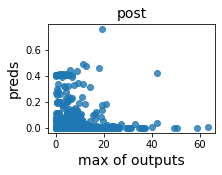

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

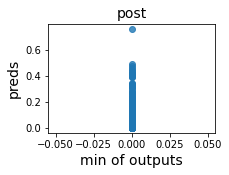

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

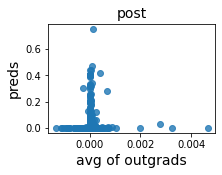

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

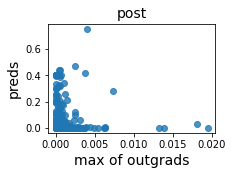

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

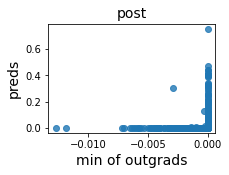

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

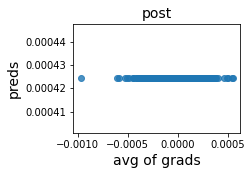

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

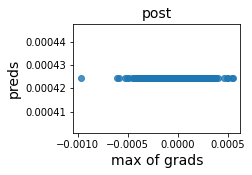

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

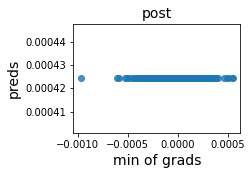

<IPython.core.display.Javascript object>

In [38]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.59


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 61
avg:2.92, pred0.00


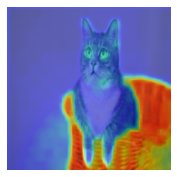

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


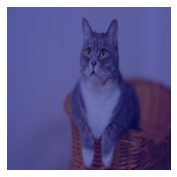

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


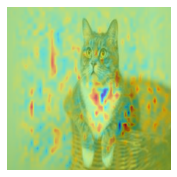

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 122
avg:0.16, pred0.01


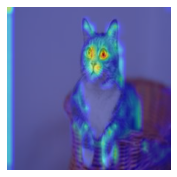

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 50
avg:-0.00, pred0.00


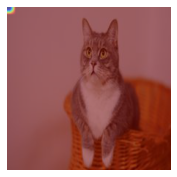

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 126
avg:0.00, pred0.00


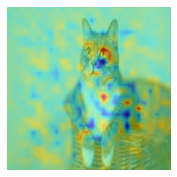

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 314
avg:0.22, pred0.54


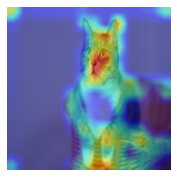

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 469
avg:-0.00, pred0.60


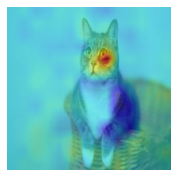

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 125
avg:-0.00, pred0.59


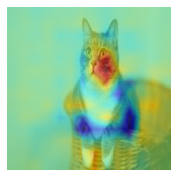

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1014
avg:0.13, pred0.53


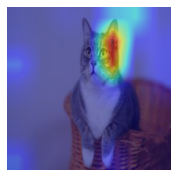

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 929
avg:0.00, pred0.64


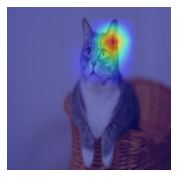

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 116
avg:0.00, pred0.55


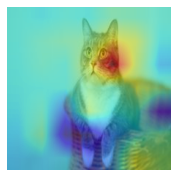

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 512
avg:0.58, pred0.76


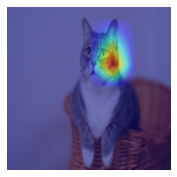

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 512
avg:0.00, pred0.75


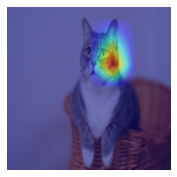

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


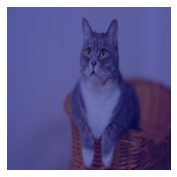

<IPython.core.display.Javascript object>

In [39]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [40]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

281


#_map  masked_pred  org_pred           avg       min        max
conv2 conv     61.0     0.000773  0.585017  2.922415e+00  1.473796   7.455331
      co*gr     6.0     0.000424  0.585017  0.000000e+00  0.000000   0.000000
      grad      0.0     0.000208  0.585017  3.224127e-05 -0.009139   0.007605
conv3 conv    122.0     0.010395  0.585017  1.571097e-01  0.000000   2.324064
      co*gr    50.0     0.000454  0.585017 -2.857244e-07 -0.000224   0.000000
      grad    126.0     0.000321  0.585017  9.225141e-06 -0.002973   0.003386
conv4 conv    314.0     0.538418  0.585017  2.194707e-01  0.000000   1.300019
      co*gr   469.0     0.599234  0.585017 -1.921919e-05 -0.005115   0.009758
      grad    125.0     0.587344  0.585017 -9.205770e-06 -0.004624   0.004974
conv5 conv   1014.0     0.525413  0.585017  1.304153e-01  0.000000   1.692659
      co*gr   929.0     0.635792  0.585017  3.033869e-04 -0.000075   0.009637
      grad    116.0     0.545202  0.585017  1.210450e-04 -0.002470   0.004069
post  conv    512.0     0.756806  0.585017  5.784294e-01  0.000000  19.417507
      co*gr   512.0     0.753727  0.585017  1.179923e-04  0.000000   0.003961
      grad      0.0     0.000424  0.585017  5.754146e-05  0.000058   0.000058

### cat3.jpg

Model prediction: class 151 , 43.02%


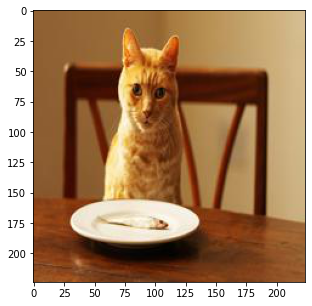

In [41]:
image = load_img('cat3.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [42]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

In [ ]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.43


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 61
avg:5.41, pred0.02


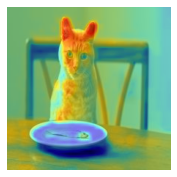

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


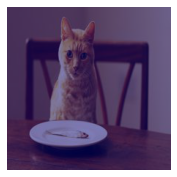

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 20
avg:-0.00, pred0.00


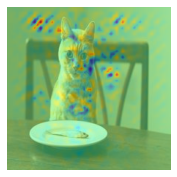

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 214
avg:2.24, pred0.00


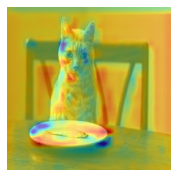

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 8
avg:-0.00, pred0.00


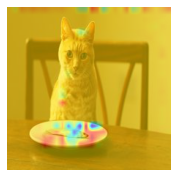

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 171
avg:-0.00, pred0.00


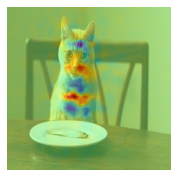

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 505
avg:0.20, pred0.12


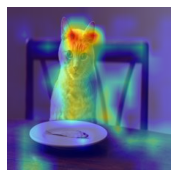

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 488
avg:0.00, pred0.02


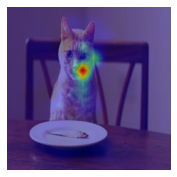

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 478
avg:0.00, pred0.89


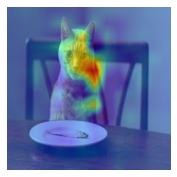

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 19
avg:0.49, pred0.34


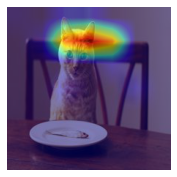

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 39
avg:-0.00, pred0.95


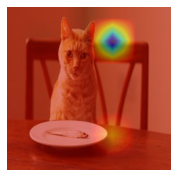

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 981
avg:0.00, pred0.79


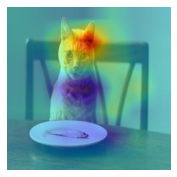

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1570
avg:6.62, pred0.46


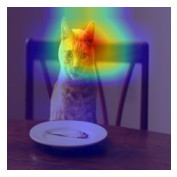

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1762
avg:0.00, pred0.24


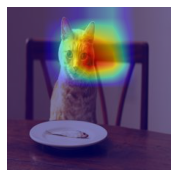

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


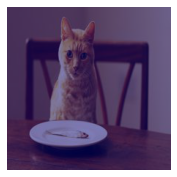

<IPython.core.display.Javascript object>

In [44]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [45]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

151


#_map  masked_pred  org_pred       avg       min        max
conv2 conv     61.0     0.016353  0.430239  5.412654  2.232474   9.249031
      co*gr     6.0     0.000511  0.430239  0.000000  0.000000   0.000000
      grad     20.0     0.000125  0.430239 -0.000022 -0.038022   0.044759
conv3 conv    214.0     0.000926  0.430239  2.240176  0.000000   3.624011
      co*gr     8.0     0.000860  0.430239 -0.000007 -0.003796   0.002170
      grad    171.0     0.000168  0.430239 -0.000091 -0.027884   0.026929
conv4 conv    505.0     0.115358  0.430239  0.196016  0.000000   1.132555
      co*gr   488.0     0.024662  0.430239  0.003793 -0.008690   0.207492
      grad    478.0     0.891776  0.430239  0.000517 -0.006875   0.024128
conv5 conv     19.0     0.337261  0.430239  0.492532  0.000000   7.283412
      co*gr    39.0     0.951361  0.430239 -0.000108 -0.004709   0.000252
      grad    981.0     0.787829  0.430239  0.000577 -0.011188   0.023789
post  conv   1570.0     0.462043  0.430239  6.620988  0.000000  51.307487
      co*gr  1762.0     0.237235  0.430239  0.000386  0.000000   0.004262
      grad      0.0     0.000511  0.430239  0.000160  0.000160   0.000160

### cat4.jpg

Model prediction: class 287 , 37.23%


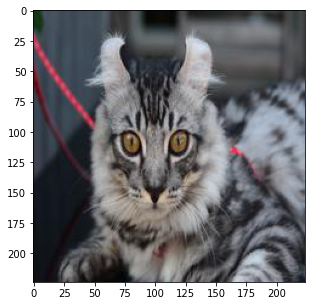

In [47]:
image = load_img('cat4.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [48]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

In [ ]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


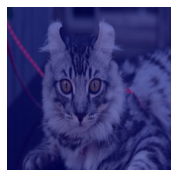

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


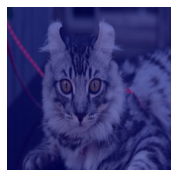

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 2
avg:-0.00, pred0.00


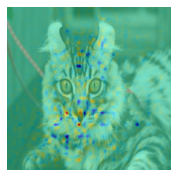

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


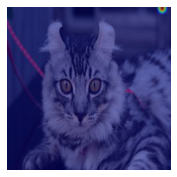

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:-0.00, pred0.00


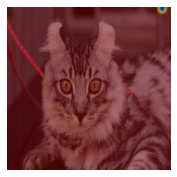

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 9
avg:0.00, pred0.00


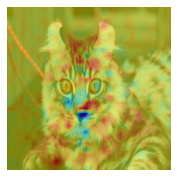

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 269
avg:1.28, pred0.00


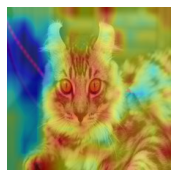

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 373
avg:0.00, pred0.01


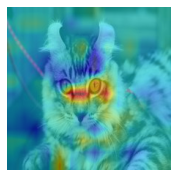

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 366
avg:0.00, pred0.02


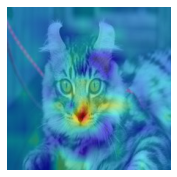

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 24
avg:0.05, pred0.06


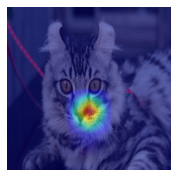

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 192
avg:-0.00, pred0.06


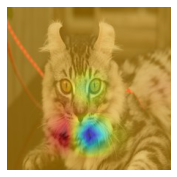

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 318
avg:-0.00, pred0.05


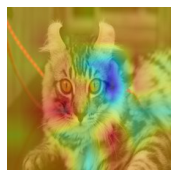

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 419
avg:0.02, pred0.06


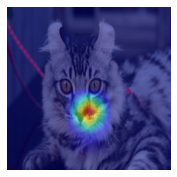

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 419
avg:0.00, pred0.06


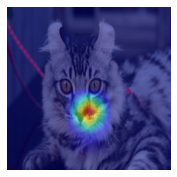

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


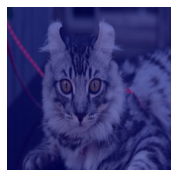

<IPython.core.display.Javascript object>

In [50]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [51]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

287


#_map  masked_pred  org_pred           avg           min       max
conv2 conv     6.0     0.000581  0.372301  0.000000e+00  0.000000e+00  0.000000
      co*gr    6.0     0.000581  0.372301  0.000000e+00  0.000000e+00  0.000000
      grad     2.0     0.000097  0.372301 -9.605440e-06 -3.203839e-02  0.042693
conv3 conv     0.0     0.000581  0.372301  2.728443e-06  0.000000e+00  0.002139
      co*gr    0.0     0.000634  0.372301 -4.820018e-10 -3.778894e-07  0.000000
      grad     9.0     0.000127  0.372301  1.327695e-05 -8.288814e-03  0.004541
conv4 conv   269.0     0.003234  0.372301  1.284035e+00  0.000000e+00  2.200800
      co*gr  373.0     0.006290  0.372301  6.246463e-05 -6.883626e-03  0.012177
      grad   366.0     0.020041  0.372301  1.381692e-04 -4.881866e-03  0.011887
conv5 conv    24.0     0.055265  0.372301  5.124504e-02  0.000000e+00  2.240881
      co*gr  192.0     0.061686  0.372301 -2.080894e-04 -1.141801e-02  0.004300
      grad   318.0     0.051441  0.372301 -7.726007e-04 -1.440852e-02  0.006249
post  conv   419.0     0.055265  0.372301  2.232030e-02  0.000000e+00  0.946661
      co*gr  419.0     0.055265  0.372301  9.329649e-08  0.000000e+00  0.000004
      grad     0.0     0.000581  0.372301  4.614100e-05  4.614101e-05  0.000046

### dog1.jpg

Model prediction: class 207 , 45.63%


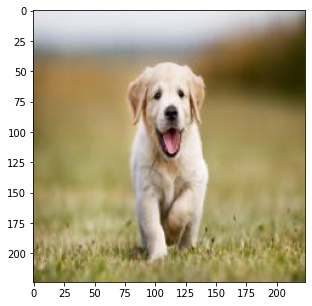

In [58]:
image = load_img('dog1.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [59]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

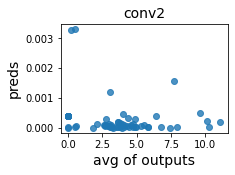

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

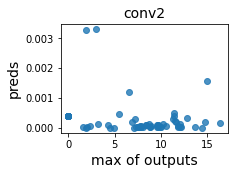

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

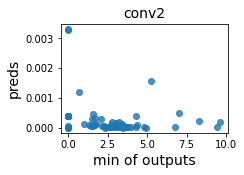

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

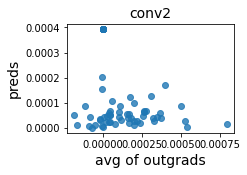

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

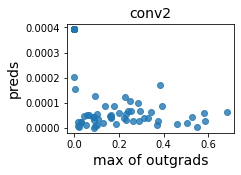

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

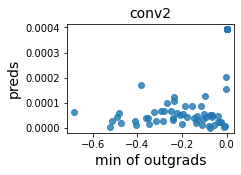

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

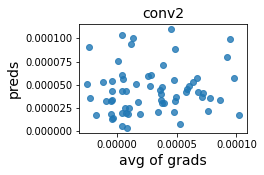

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

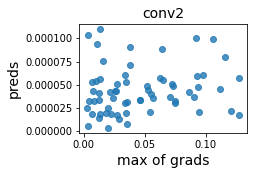

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

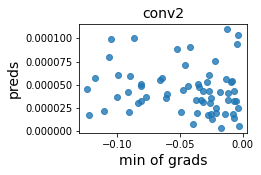

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

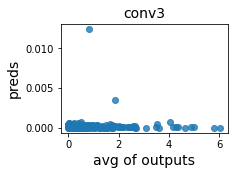

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

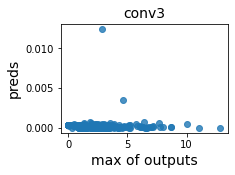

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

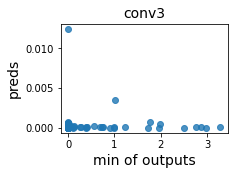

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

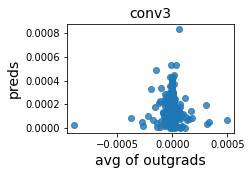

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

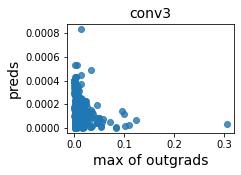

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

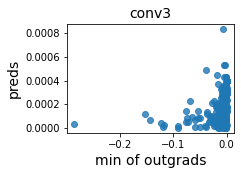

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

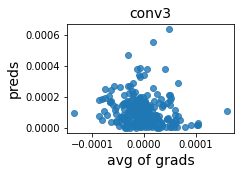

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

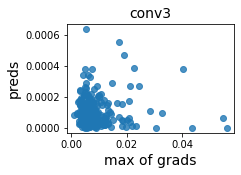

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

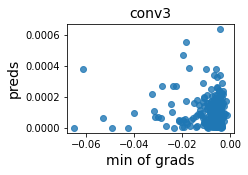

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

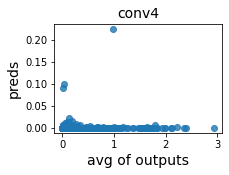

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

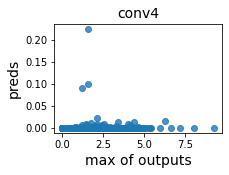

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

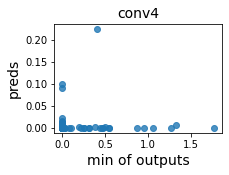

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

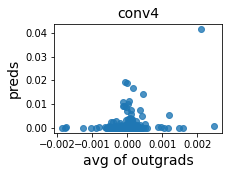

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

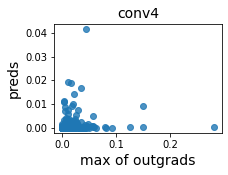

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

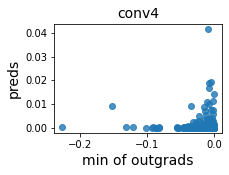

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

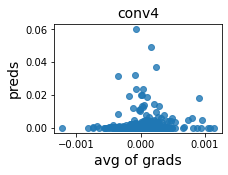

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

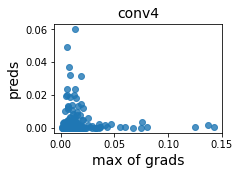

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

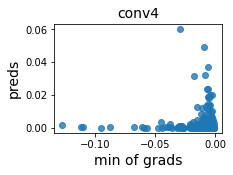

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

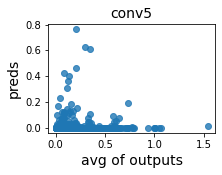

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

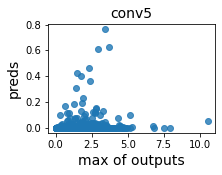

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

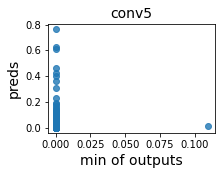

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

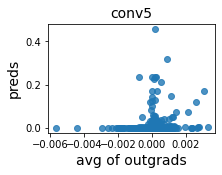

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

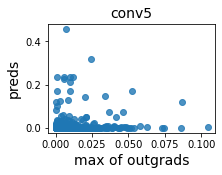

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

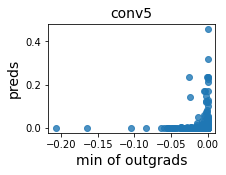

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

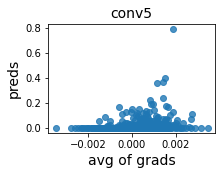

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

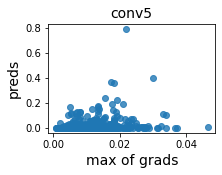

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

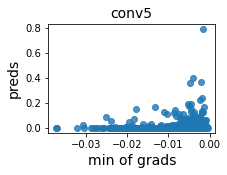

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

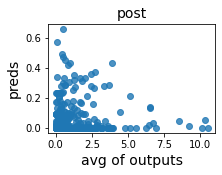

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

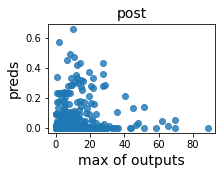

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

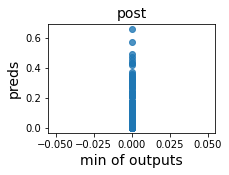

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

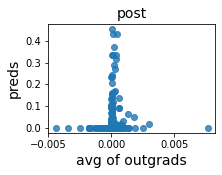

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

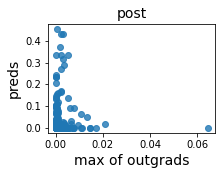

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

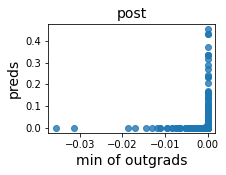

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

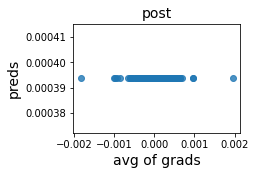

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

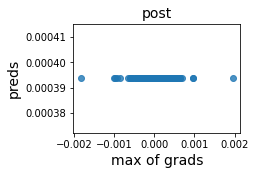

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

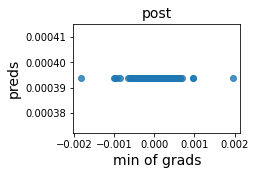

<IPython.core.display.Javascript object>

In [60]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.46


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 16
avg:0.47, pred0.00


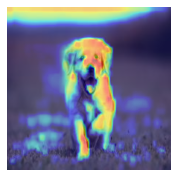

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


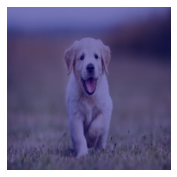

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


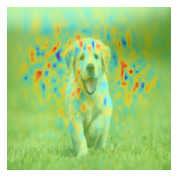

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 155
avg:0.82, pred0.01


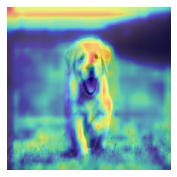

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 113
avg:0.00, pred0.00


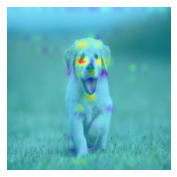

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 118
avg:0.00, pred0.00


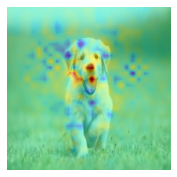

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 455
avg:0.99, pred0.22


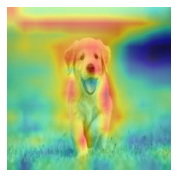

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 488
avg:0.00, pred0.04


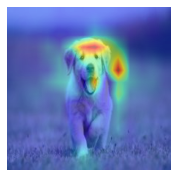

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 423
avg:-0.00, pred0.06


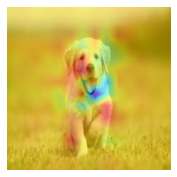

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 237
avg:0.20, pred0.77


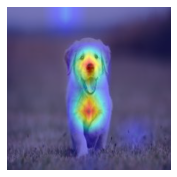

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 585
avg:0.00, pred0.46


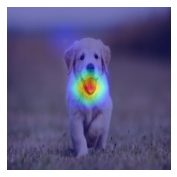

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 707
avg:0.00, pred0.79


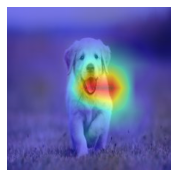

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 956
avg:0.52, pred0.66


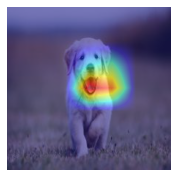

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1055
avg:0.00, pred0.45


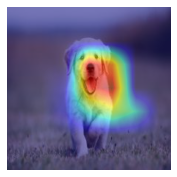

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:-0.00, pred0.00


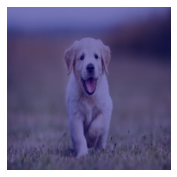

<IPython.core.display.Javascript object>

In [61]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [62]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

207


#_map  masked_pred  org_pred       avg       min       max
conv2 conv     16.0     0.003317  0.456271  0.474513  0.000000  3.014162
      co*gr     6.0     0.000394  0.456271  0.000000  0.000000  0.000000
      grad      0.0     0.000110  0.456271  0.000045 -0.012930  0.012956
conv3 conv    155.0     0.012437  0.456271  0.819332  0.000000  2.825906
      co*gr   113.0     0.000837  0.456271  0.000065 -0.006325  0.013279
      grad    118.0     0.000636  0.456271  0.000049 -0.003979  0.005435
conv4 conv    455.0     0.224907  0.456271  0.988599  0.408829  1.587452
      co*gr   488.0     0.041553  0.456271  0.002103 -0.009566  0.044634
      grad    423.0     0.060260  0.456271 -0.000072 -0.029256  0.013427
conv5 conv    237.0     0.765362  0.456271  0.202272  0.000000  3.424204
      co*gr   585.0     0.457250  0.456271  0.000186 -0.000003  0.007406
      grad    707.0     0.791400  0.456271  0.001881 -0.001591  0.021977
post  conv    956.0     0.661801  0.456271  0.518061  0.000000  9.876177
      co*gr  1055.0     0.453936  0.456271  0.000060  0.000000  0.000572
      grad      0.0     0.000394  0.456271 -0.000028 -0.000028 -0.000028

### dog2.jpg

Model prediction: class 208 , 90.19%


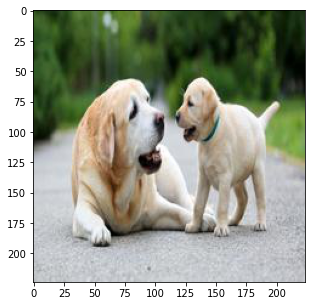

In [63]:
image = load_img('dog2.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [64]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

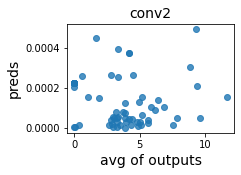

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

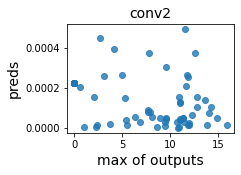

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

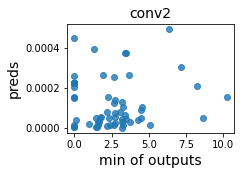

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

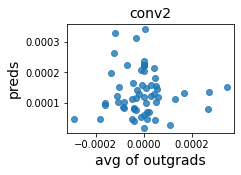

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

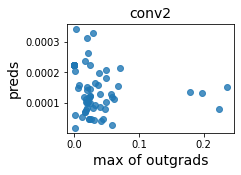

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

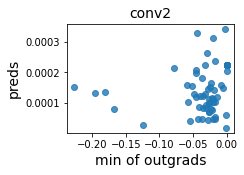

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

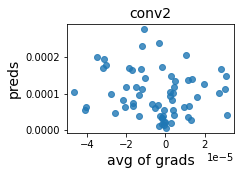

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

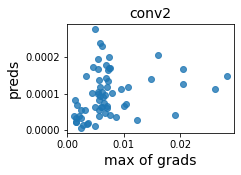

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

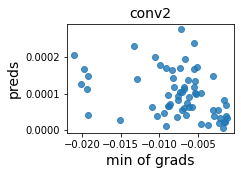

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

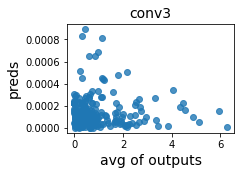

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

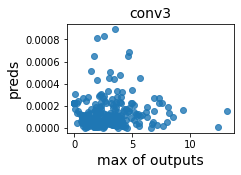

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

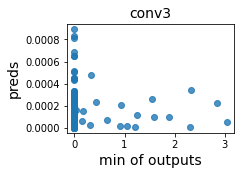

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

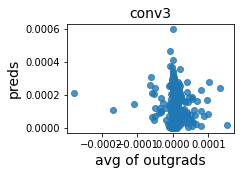

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

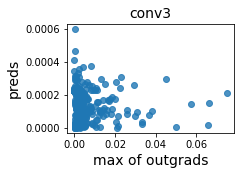

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

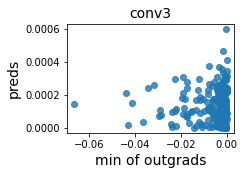

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

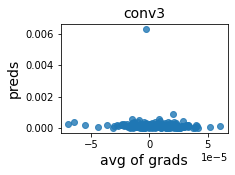

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

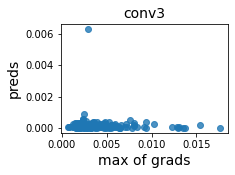

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

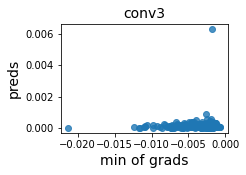

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

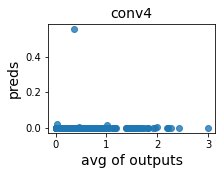

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

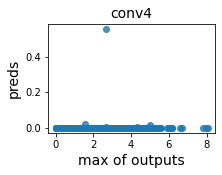

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

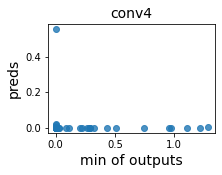

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

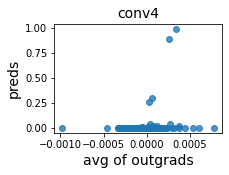

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

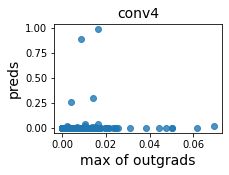

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

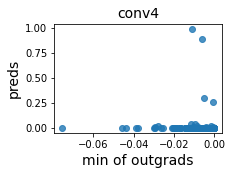

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

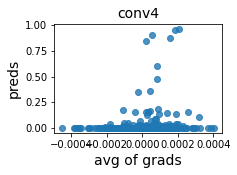

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

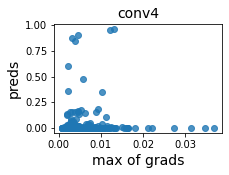

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

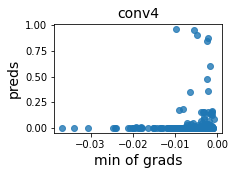

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

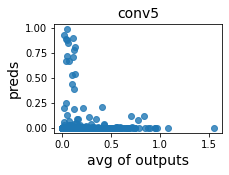

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

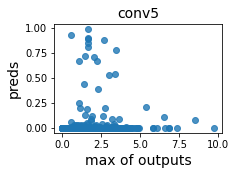

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

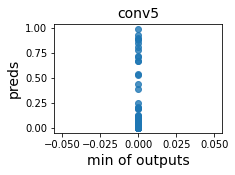

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

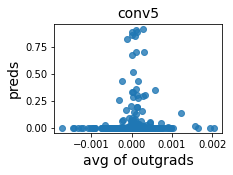

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

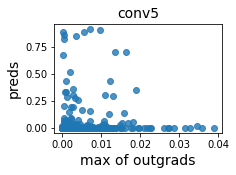

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

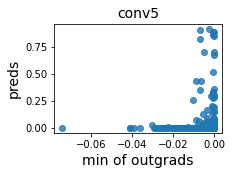

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

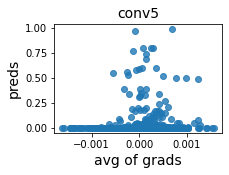

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

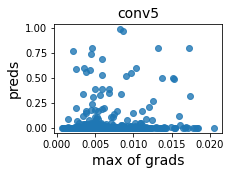

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

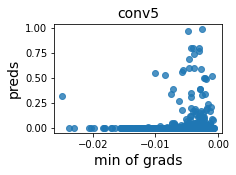

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

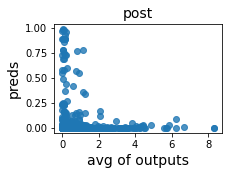

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

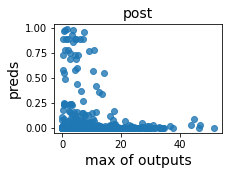

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

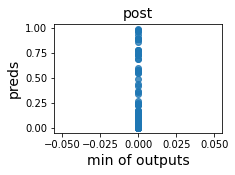

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

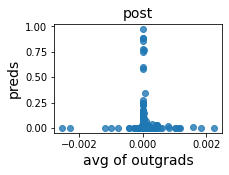

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

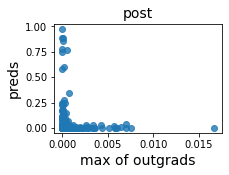

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

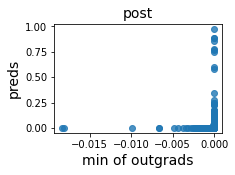

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

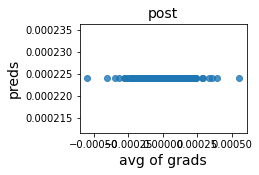

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

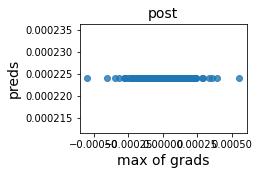

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

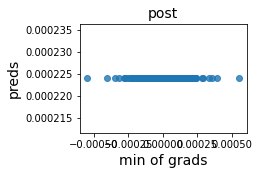

<IPython.core.display.Javascript object>

In [65]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.90


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 58
avg:9.34, pred0.00


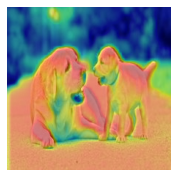

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 8
avg:0.00, pred0.00


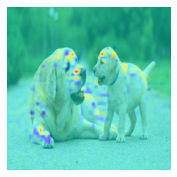

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 63
avg:-0.00, pred0.00


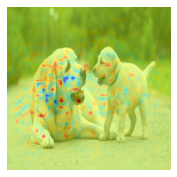

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 8
avg:0.41, pred0.00


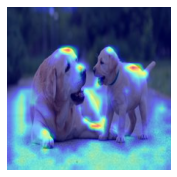

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 163
avg:0.00, pred0.00


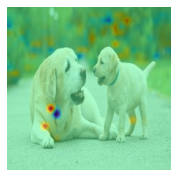

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 83
avg:-0.00, pred0.01


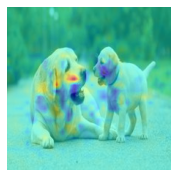

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 415
avg:0.36, pred0.55


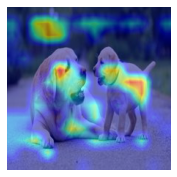

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 269
avg:0.00, pred0.99


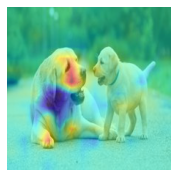

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 269
avg:0.00, pred0.96


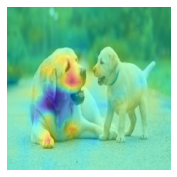

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 778
avg:0.05, pred0.99


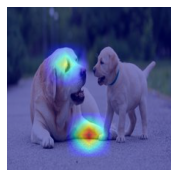

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 535
avg:0.00, pred0.92


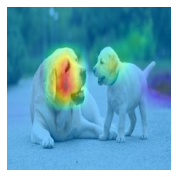

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 808
avg:0.00, pred0.99


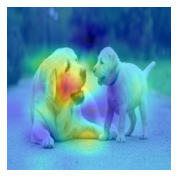

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 271
avg:0.04, pred0.99


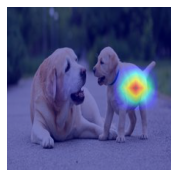

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 295
avg:0.00, pred0.97


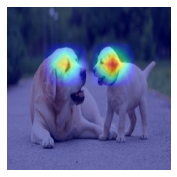

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:-0.00, pred0.00


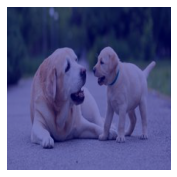

<IPython.core.display.Javascript object>

In [66]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [67]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

208


#_map  masked_pred  org_pred           avg       min        max
conv2 conv    58.0     0.000494   0.90186  9.335073e+00  6.369181  11.549789
      co*gr    8.0     0.000343   0.90186  7.436593e-06 -0.002041   0.003125
      grad    63.0     0.000278   0.90186 -1.093614e-05 -0.007158   0.004881
conv3 conv     8.0     0.000894   0.90186  4.142201e-01  0.000000   3.530854
      co*gr  163.0     0.000599   0.90186  1.563897e-06 -0.000195   0.000230
      grad    83.0     0.006311   0.90186 -2.442975e-06 -0.001829   0.002922
conv4 conv   415.0     0.554953   0.90186  3.566243e-01  0.000000   2.664748
      co*gr  269.0     0.986980   0.90186  3.382842e-04 -0.011177   0.016542
      grad   269.0     0.963559   0.90186  2.063022e-04 -0.009799   0.013014
conv5 conv   778.0     0.985806   0.90186  5.338519e-02  0.000000   1.636116
      co*gr  535.0     0.915633   0.90186  2.735293e-04 -0.002729   0.007165
      grad   808.0     0.987849   0.90186  6.998189e-04 -0.002489   0.008276
post  conv   271.0     0.986206   0.90186  3.501945e-02  0.000000   1.640926
      co*gr  295.0     0.974839   0.90186  8.425283e-07  0.000000   0.000023
      grad     0.0     0.000224   0.90186 -1.853058e-05 -0.000019  -0.000019

### car.jpg

Model prediction: class 817 , 58.23%


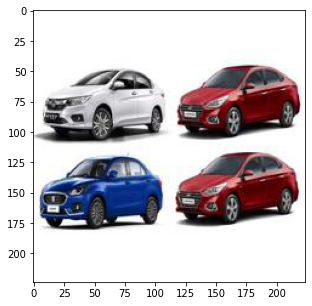

In [78]:
image = load_img('car.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

preds = model.predict(image) 
pred = np.max(preds)
class_index = np.argmax(preds)
print("Model prediction: class", class_index, ", {:2.2f}%".format(pred*100))

plt.figure(figsize = (5,5))
plt.imshow(image[0])

In [79]:
l_inputs, l_results, pred = sp_xai_layers(images = image, 
                  model=model, 
                  layers = mask_layers, 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

In [ ]:
# plot scatter plots
show_scatter_plot(mask_layers, l_inputs, l_results)

model pred: 0.58


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv2_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 61
avg:2.49, pred0.15


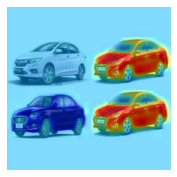

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 32
avg:0.00, pred0.00


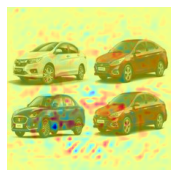

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 6
avg:0.00, pred0.00


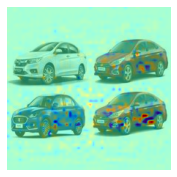

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv3_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 175
avg:0.14, pred0.18


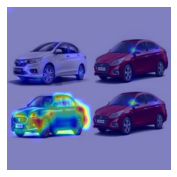

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 68
avg:0.00, pred0.00


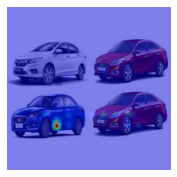

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 186
avg:0.00, pred0.00


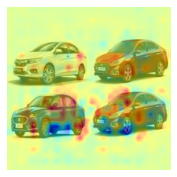

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv4_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 366
avg:0.08, pred0.81


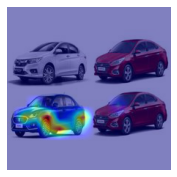

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 90
avg:-0.00, pred0.05


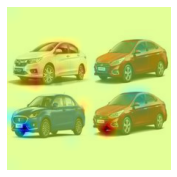

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 500
avg:0.00, pred0.17


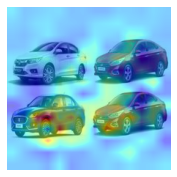

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

conv5_block1_preact_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 892
avg:0.03, pred0.53


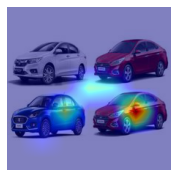

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 609
avg:-0.00, pred0.62


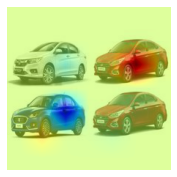

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 105
avg:0.00, pred0.75


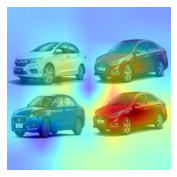

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

post_relu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 1680
avg:0.58, pred0.87


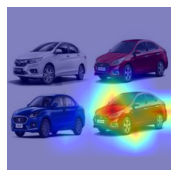

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 596
avg:0.00, pred0.80


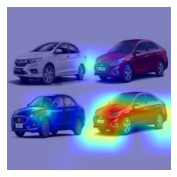

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

index: 0
avg:0.00, pred0.00


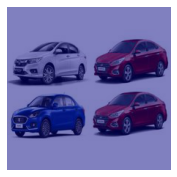

<IPython.core.display.Javascript object>

In [81]:
# show saliency maps
print ('model pred: {:.2f}'.format(pred[0]))
show_saliency_maps(mask_layers, l_inputs, l_results)

In [82]:
result_df = maks_result_table(mask_layers, pred, l_inputs, l_results)
print (class_index)
result_df

817


#_map  masked_pred  org_pred       avg       min       max
conv2 conv     61.0     0.150626  0.582343  2.490325  0.000000  6.974184
      co*gr    32.0     0.000315  0.582343  0.000160 -0.050280  0.034621
      grad      6.0     0.000288  0.582343  0.000003 -0.002353  0.002551
conv3 conv    175.0     0.179082  0.582343  0.139932  0.000000  2.982599
      co*gr    68.0     0.001159  0.582343  0.000046 -0.000957  0.010822
      grad    186.0     0.000143  0.582343  0.000024 -0.003126  0.002281
conv4 conv    366.0     0.809922  0.582343  0.081782  0.000000  2.621561
      co*gr    90.0     0.050182  0.582343 -0.000002 -0.006311  0.004322
      grad    500.0     0.166011  0.582343  0.000255 -0.001583  0.004125
conv5 conv    892.0     0.529875  0.582343  0.025275  0.000000  0.483298
      co*gr   609.0     0.615020  0.582343 -0.000067 -0.008447  0.006145
      grad    105.0     0.751145  0.582343  0.001737 -0.002936  0.008847
post  conv   1680.0     0.873502  0.582343  0.577718  0.000000  5.647227
      co*gr   596.0     0.801957  0.582343  0.000024  0.000000  0.000209
      grad      0.0     0.000286  0.582343  0.000140  0.000140  0.000140